<a href="https://colab.research.google.com/github/shivam-bajaj/TensorFlow/blob/master/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


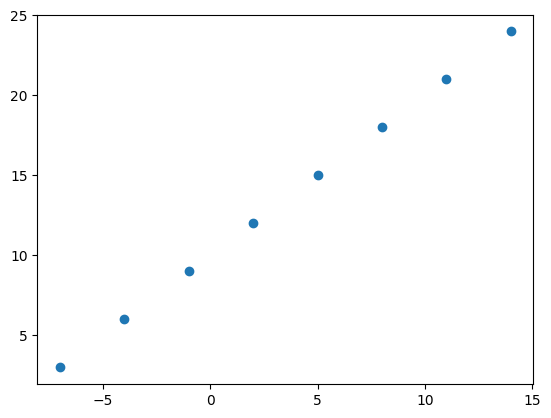

In [32]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [33]:
# relationship
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [34]:
# turn numpy arrays into tensors
X = tf.constant(X)
y= tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [35]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [36]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential()
#Input Layer
model.add(tf.keras.layers.Input(shape=(1,)))
#Hidden layer
model.add(tf.keras.layers.Dense(1))
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100,verbose=0)

In [37]:
pd.DataFrame(model.history.history)

,loss,mae
0,11.766490,11.766490
1,11.633989,11.633989
2,11.501490,11.501490
3,11.368990,11.368990
4,11.236490,11.236490
...,...,...
95,6.900001,6.900001
96,6.894375,6.894375
97,6.888750,6.888750
98,6.883125,6.883125


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['loss'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['mae'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['loss'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['mae'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['loss', 'mae']]], **{})
chart

In [38]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 118ms/step


array([[30.082397]], dtype=float32)

The relationship is `y=X+10`  
So Value should be `y=17+10=27`

For Evaluating the model we need a bigger data than this

## Make a Bigger dataset

In [39]:
X = np.arange(-100, 100, 4)
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
X,y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [40]:
# Relationship
np.array_equal(y,X+10)

True

## Splitting The Dataset

In [41]:
len(X)

50

In [42]:
# split the data 80:20
X_train = X[:40]
y_train = y[:40]
X_test =  X[40:]
y_test =  y[40:]
len(X_train),len(X_test)

(40, 10)

In [43]:
X_train,X_test,y_train,y_test

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56]),
 array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66]),
 array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

## Visualise the data

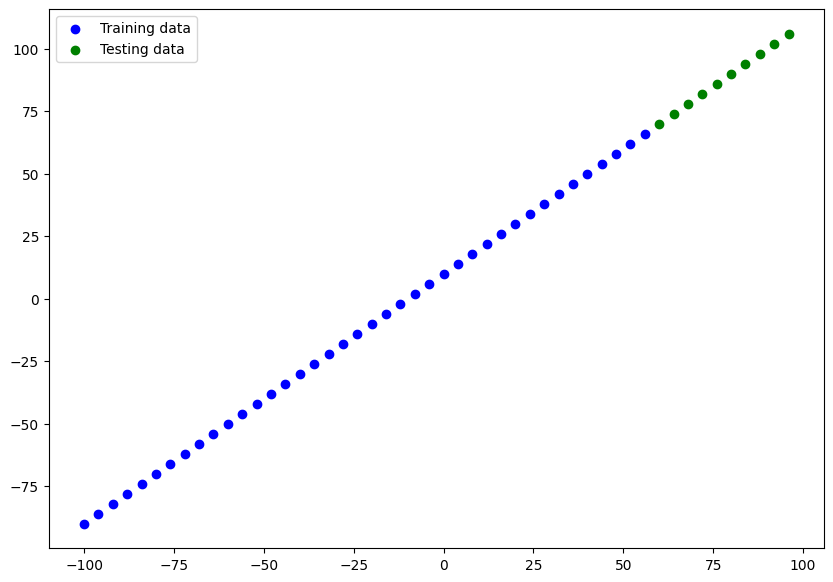

In [44]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

## Build Model

In [45]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential()
#Input Layer
model.add(tf.keras.layers.Input(shape=(1,)))
#Hidden layer
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])


In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train, y_train, epochs=100, verbose=0)

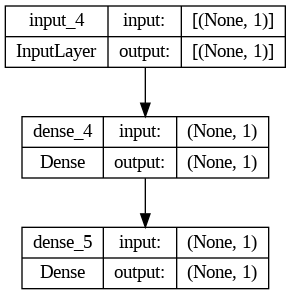

In [48]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [49]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 62ms/step


array([[ 89.93524 ],
       [ 95.80458 ],
       [101.67393 ],
       [107.54327 ],
       [113.412605],
       [119.28195 ],
       [125.15129 ],
       [131.02063 ],
       [136.88998 ],
       [142.75932 ]], dtype=float32)

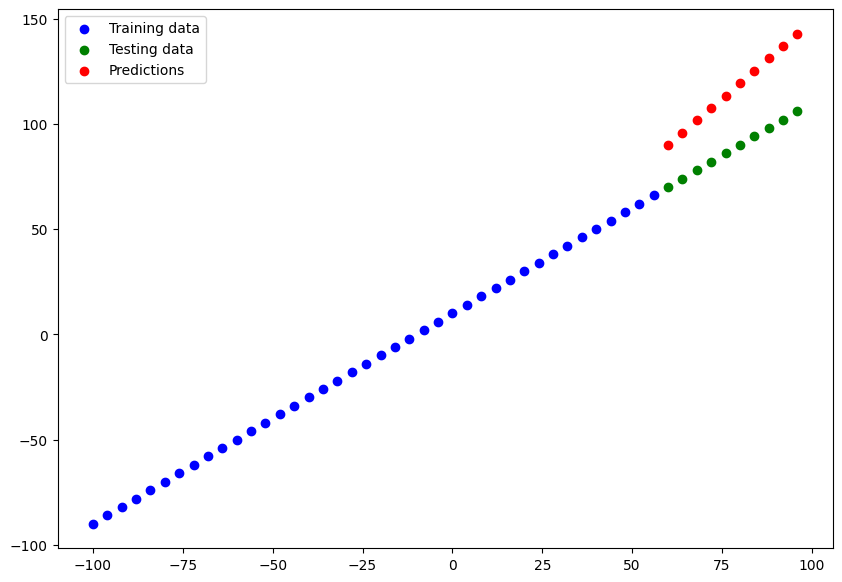

In [50]:
# Viusalising predictions on graph
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train,y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test,y_test, c="g", label="Testing data")
# Plot the predictions in red (predictions were made on the test data)
plt.scatter(X_test,y_pred, c="r", label="Predictions")
# Show the legend
plt.legend()

## Evaluating Predictions

Two of the main metrics used for regression problems are:

- Mean absolute error (MAE) - the mean difference between each of the predictions.
- Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [51]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 139ms/step - loss: 28.3473 - mae: 28.3473


[28.347278594970703, 28.347278594970703]

In [52]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.      , 11.521832, 14.604357, 19.543266, 25.412605, 31.281952,
       37.15129 , 43.02063 , 48.889984, 54.759327], dtype=float32)>

we get 10 values.
This is because our `y_test` and `y_pred` tensors are different shapes

In [53]:
y_test.shape,y_pred.shape

((10,), (10, 1))

In [54]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=28.347279>

In [55]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=832.39746>

## Saving the model

You can save a TensorFlow/Keras model using `model.save()`.

There are two ways to save a model in TensorFlow:

- The SavedModel format (default).
- The HDF5 format.


In [56]:
# Save a model using the SavedModel format
model.save("tf_regression_practice_model")

In [57]:
# Save a model using the HDF5 format
model.save("tf_regression_practice_model.h5")

In [59]:
# Check it out
!ls tf_regression_practice_model.h5

tf_regression_practice_model.h5


## Loading the Model

In [61]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model('/content/tf_regression_practice_model')
loaded_saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("tf_regression_practice_model.h5")
loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Downloading a model (from Google Colab)

In [64]:
from google.colab import files
files.download('tf_regression_practice_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>